**Ex 1.2.1.  How would you do this operation with two lists [1.0,2.0,3.0] and [7.0, 8.0, 9.0]**  
**Hint: `zip`**

In [1]:
import numpy as np
A = [1.0, 2.0, 3.0]
B = [7.0, 8.0, 9.0]
C = [a+3*b for a,b in zip(A,B)]
C

[22.0, 26.0, 30.0]

**Ex 1.2.2 Using only NumPy operations, create a vector containing the numbers from 1 to 10.  Then construct from there a vector with the squares from $1^2$ to $10^2$.**

In [2]:
import numpy as np

one_to_ten = np.arange(1,10+1)
print(one_to_ten)
first_ten_squares = one_to_ten * one_to_ten  # Multiply vec against itself
print(first_ten_squares)

one_to_ten = np.linspace(1.0, 10.0, 10)  # Or use np.linspace
print(one_to_ten)
first_ten_squares = one_to_ten ** 2          # Element-wise squaring
print(first_ten_squares)

[ 1  2  3  4  5  6  7  8  9 10]
[  1   4   9  16  25  36  49  64  81 100]
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[   1.    4.    9.   16.   25.   36.   49.   64.   81.  100.]


Note that the two definitions of `one_to_ten` give slightly different answers.  The first one is an array of integers, the second, an array of floats

**Ex 1.2.3. Calculate the dot product of A and B without using np.dot**

In [3]:
A = np.array([1.0, 2.0, 3.0])
B = np.array([7.0, 8.0, 9.0])
np.sum(A*B)

50.0

**Ex 1.2.4  Use `dot` and `linspace` to calculate the following sum:**

$$
1\cdot 2 + 2\cdot 3 + \cdots + 10\cdot 11.
$$

In [4]:
v = np.linspace(1,10,10)
np.dot(v, v+1)

440.0

In [5]:
np.dot(np.linspace(1,10,10), np.linspace(2,11,10))

440.0

**Ex 1.2.5 Write your own my_cumsum() and my_cumprod() functions that operate on lists instead of NumPy arrays**

In [6]:
def my_cumsum(xs):
    result = []
    sofar = 0.0
    for x in xs:
        sofar = sofar + x
        result.append(sofar)
    return result

my_cumsum([1,1.5,2,2.5,3,3.5,4])

[1.0, 2.5, 4.5, 7.0, 10.0, 13.5, 17.5]

In [7]:
def my_cumsum(xs):
    return [sum(xs[:i]) for i in range(1,len(xs)+1)]

my_cumsum([1,1.5,2,2.5,3,3.5,4])

[1, 2.5, 4.5, 7.0, 10.0, 13.5, 17.5]

In [8]:
def my_cumprod(xs):
    result = []
    sofar = 1.0
    for x in xs:
        sofar = sofar * x
        result.append(sofar)
    return result

my_cumprod([1,1.5,2,2.5,3,3.5,4])

[1.0, 1.5, 3.0, 7.5, 22.5, 78.75, 315.0]

**Ex 1.2.6. With the help of IPython's autocomplete, calculate the Singular Value Decomposition U * S * V of the matrix `mat` above.  Combine the resulting matrices to verify that the decomposition is correct.**

In [9]:
mat = np.array([
        [1., 2.],
        [3., 4.]
    ])

u, s, v = np.linalg.svd(mat)
print(u)
print(np.diag(s))
print(v)

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
[[ 5.4649857   0.        ]
 [ 0.          0.36596619]]
[[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]


In [10]:
# The promise is that u * np.diag(s) * v == mat
# But note that '*' here is matrix multiplication (np.dot),
# not element-wise multiplication
print(mat)
print(np.dot(u, np.dot(np.diag(s), v)))

[[ 1.  2.]
 [ 3.  4.]]
[[ 1.  2.]
 [ 3.  4.]]


**(!) Ex 1.2.7.  We're having elections in a few weeks!  If we could ask everyone their opinion, we'd find the vote split like this:**
* **60%: Oligarch's Party**
* **40%: Plutocrat's Party**

**But we can't ask everyone: we have to do a survey.**

**Write a function to run a survey with N people, returning the fraction that supports the Oligarch's Party.  Now write another function to run K surveys, and reports the mean and standard deviation of the results of the surveys.**

**By picking a large value for K, estimate the margin of error of a survey of 100 people.  What about 1000 people?  Would it be much better to ask 10,000 people? 1,000,000 people?**

In [11]:
import numpy as np

def run_survey(N):
    # You can write this in many ways...
    return np.sum(np.random.rand(N) < 0.60) / float(N)

def run_survey_2(N):
    # Alternative 1: really explicit
    oligarchs = 0
    plutocrats = 0
    for i in range(N):
        if np.random.rand() < 0.60:
            oligarchs = oligarchs + 1
        else:
            plutocrats = plutocrats + 1
            
    return oligarchs / float(N)

def run_survey_3(N):
    # Alternative 2: vector random but explicit counting
    oligarchs = 0
    plutocrats = 0
    for p in np.random.rand(N):
        if p < 0.60:
            oligarchs = oligarchs + 1
        else:
            plutocrats = plutocrats + 1
            
    return oligarchs / float(N)

def run_survey_4(N):
    # Alternative 3: vector random and filtering,
    # but no implicit bool -> int conversion
    
    answers = np.random.rand(N)
    
    oligarchs  = len(answers[answers <  0.60])
    plutocrats = len(answers[answers >= 0.60])
    
    return oligarchs / float(N)

def run_survey_5(N):
    # If you read the NumPy docs carefully, you'll find `binomial`...
    return np.random.binomial(N, 0.60) / float(N)

print(run_survey(100))
print(run_survey_2(100))
print(run_survey_3(100))
print(run_survey_4(100))
print(run_survey_5(100))

0.58
0.57
0.53
0.61
0.57


In [12]:
def run_many_surveys(N, K):
    # There are also many other ways of writing this one...
    results = np.array([run_survey(N) for i in range(K)])
    return results.mean(), results.std()

def run_many_surveys_2(N, K):
    results = np.random.binomial(N, 0.60, K) / float(N)
    return results.mean(), results.std()

In [13]:
def run_experiment(N):
    mean_result, margin_of_error = run_many_surveys(N, K=1000)
    print("When asking {0} people, the margin of error is {1:.2%}"
          .format(N, margin_of_error))

In [14]:
run_experiment(100)
run_experiment(1000)
run_experiment(10000)
run_experiment(1000000)

When asking 100 people, the margin of error is 4.86%
When asking 1000 people, the margin of error is 1.53%
When asking 10000 people, the margin of error is 0.51%
When asking 1000000 people, the margin of error is 0.05%


Of course, if you know some statistics, you can calculate the margins of error without simulation.  Interviewing a single person is a Bernoulli trial with $p=0.6$ for a result of $1$ (Oligarch's party) and $q=0.4$ for a result of $0$ (Plutocrat's Party).  The variance of a single interview is $p q$.  The variance in the total number of people answering "Oligarch's Party" is $N p q$, so the variance in the fraction of people answering "Oligarch's party" is $p q / N$

In [15]:
from math import sqrt
print("{0:.2%}".format(sqrt(0.6 * 0.4 / 100)))
print("{0:.2%}".format(sqrt(0.6 * 0.4 / 1000)))
print("{0:.2%}".format(sqrt(0.6 * 0.4 / 10000)))
print("{0:.2%}".format(sqrt(0.6 * 0.4 / 1000000)))

4.90%
1.55%
0.49%
0.05%


Of course, the simulation results are themselves subject to statistical error (!), which I tried to keep very low by setting $K$ to 1000.

**Ex 1.2.8  Sort the following list of full names by surname:**
```
names = ["John Doe", "Mary Jane", "Jake Williamson", "Jack Ripper"]
```

In [16]:
names = ["John Doe", "Mary Jane", "Jake Williamson", "Jack Ripper"]

In [17]:
# Do it using a named function

def surname(name):
    return name.split(" ")[1]

sorted(names, key=surname)

['John Doe', 'Mary Jane', 'Jack Ripper', 'Jake Williamson']

In [18]:
# Do it using a lambda
sorted(names, key=lambda x: x.split(" ")[1])

['John Doe', 'Mary Jane', 'Jack Ripper', 'Jake Williamson']

**(!!) Ex 1.2.9  Least-squares fitting from first principles**

**(a) Write a function f(x, m, c) that represents a straight line according to the following equation:**

$$
f(x, m, c) = m x + c.
$$

**(b) Using a lambda, how would you specialize this function to a 1-parameter function g(x), defined as follows:**

$$
g(x) = f(x, 5.0, 2.0).
$$

_As in the survey exercise above, we'll generate some simulated data to test out our least-squares fit._

**(c) Write a function to generate N random values of x between 0.0 and 10.0.**

**(d) Write a function to generate the corresponding values of g(x), plus some normal random noise of standard deviation 0.1 and mean 0.0.**

**(e) Least-squares fitting tries to find values of $m$ and $c$ that can be plugged into $y = f(x, m, c)$ that minimize the distance between the actual $y$s and the model $y$s.  In other words, it minimizes the following loss function:**

$$
L(m, c) = \sum_{i=1}^N [y_i - f(x_i, m, c)]^2.
$$

**Write a Python function that calculate L(m, c, xs, ys) given a set of $x_i$ and corresponding $y_i$.**

**(f) Use SciPy to minimize this function and estimate the values of $m$ and $c$.  How close are they to the values used to generate the simulated data?**

In [19]:
def f(x, m, c):
    return m*x + c

In [20]:
g = lambda x: f(x, 5.0, 2.0)

In [21]:
def rand_xs(N=100):
    # Need to map [0,1) returned by np.random.rand() to [0,10)
    return 0.0 + (10.0 - 0.0)*np.random.rand(100)

In [22]:
xs = rand_xs()
print(xs[:10])  # Always useful to have a look at some of your data for sanity

[ 1.25649114  2.96402788  4.83177554  2.5809332   8.586808    9.73663284
  5.20091477  7.19920909  7.55274032  3.90760008]


In [23]:
def corresponding_ys(xs, g):
    exact_ys = np.array([g(x) for x in xs])
    noise = 0.0 + 0.1*np.random.randn(len(xs))
    return exact_ys + noise

# Could also use np.vectorize to allow element-wise application of g(x)
# over array elements, as follows:
#
#   exact_ys = np.vectorize(g)(xs)

In [24]:
ys = corresponding_ys(xs, lambda x: f(x, 5.0, 2.0))
ys[:10]

array([  8.08596298,  16.91734217,  26.33203002,  14.91873081,
        44.88562346,  50.54526357,  27.96331898,  37.9526478 ,
        39.72889133,  21.57041287])

In [25]:
def L(m, c, xs, ys):
    model_ys = np.array([f(x, m, c) for x in xs])
    deltas = ys - model_ys
    #return np.sum((ys - model_ys)**2)
    return np.dot(deltas, deltas)

In [26]:
print L(5.0, 2.0, xs, ys)   # This should be very close to minimal
print L(5.1, 2.0, xs, ys)
print L(4.9, 2.0, xs, ys)
print L(5.0, 2.1, xs, ys)
print L(5.0, 1.9, xs, ys)

1.17375750982
37.3790566476
36.1205311081
2.31269264565
2.03482237398


In [27]:
from scipy.optimize import minimize
m0_c0 = [0.0, 0.0]  # Initial guesses for m and c
res = minimize(lambda m_c: L(m_c[0], m_c[1], xs, ys), m0_c0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True})
print res

Optimization terminated successfully.
         Current function value: 1.168714
         Iterations: 122
         Function evaluations: 236
  status: 0
    nfev: 236
 success: True
     fun: 1.1687137829885372
       x: array([ 5.00049455,  1.99049953])
 message: 'Optimization terminated successfully.'
     nit: 122


Using Nelder-Mead, we get very close to original values without spending too much time.  Not worth it for this use case to add derivative information.

**Ex 1.3.1  Earlier, we minimized the function f(x) below and found it had a minimum at $x=-1.25$.  Plot this function and verify that this result is correct.**

$$
f(x) = 2 x^2 + 5 x - 7.
$$

In [28]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

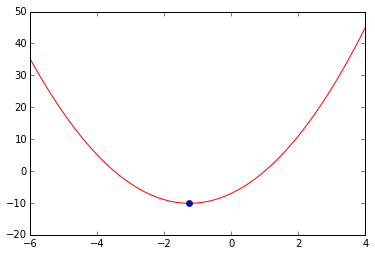

In [29]:
x = np.linspace(-6.0, 4.0, 100)
y = 2*x**2 + 5*x - 7
plt.plot(x,y,'r-')

# We can add a blue dot at the purported minimum directly
plt.plot([-1.25],[-10.125],'bo')

**Ex 1.4.1 Starting from a dictionary, build a `Series` to represent the population of Belgium broken down by province.  Give both the series and the index a proper name.  From that `Series`, use indexing to sort the `Series` by number of customers.**  
Note: We'll see how to sort `Series` easily later.  For now, use explicit indexing.

In [30]:
# Import pandas
from pandas import Series, DataFrame
import pandas as pd

In [31]:
# These population numbers are completely fake:
customer_data = {
    'Antwerp':       100000,
    'Limburg':        50000,
    'Brussels':      250000,
}
obj = Series(customer_data)
obj.name = 'population'
obj.index.name = 'province'
obj

province
Antwerp     100000
Brussels    250000
Limburg      50000
Name: population, dtype: int64

In [32]:
# Sort by explicit indexing
obj[['Brussels', 'Antwerp', 'Limburg']]

province
Brussels    250000
Antwerp     100000
Limburg      50000
Name: population, dtype: int64

In [33]:
# Here's how you would sort a series programatically
# (maybe you found out already using IPython's TAB-completion and help!)
obj.sort()  # In-place sort
obj

province
Limburg      50000
Antwerp     100000
Brussels    250000
Name: population, dtype: int64

In [34]:
# Non-destructive sort
obj.order(ascending=False)

province
Brussels    250000
Antwerp     100000
Limburg      50000
Name: population, dtype: int64

In [35]:
obj

province
Limburg      50000
Antwerp     100000
Brussels    250000
Name: population, dtype: int64

**Ex 1.4.2 Build a DataFrame that captures how the population in each  province of Flanders changed in the years 2013, 2014 and 2015.**

In [36]:
# Again, totally made-up numbers here
data = {
    'province': ['BXL', 'BXL', 'BXL', 'ANT', 'ANT', 'ANT'],
    'year': [2013, 2014, 2015, 2013, 2014, 2015],
    'customers': [150000, 200000, 250000, 200000, 150000, 100000]
}
frame = DataFrame(data, columns=['year', 'province', 'customers'])
frame

,year,province,customers
0,2013,BXL,150000
1,2014,BXL,200000
2,2015,BXL,250000
3,2013,ANT,200000
4,2014,ANT,150000
5,2015,ANT,100000


**Ex 1.4.3 Quick: what's the difference between `frame2.drop('beer_quality')` and `del frame2['beer_quality']`?**

`drop` makes a copy of `frame2` with the column removed, whereas `del` removes the column from the original `frame2`

**Ex 1.4.5 Let's get some practice with slicing and dicing data.  Given the following DataFrame, extract:**
1. **the first 2 rows**
2. **the second and third column**
3. **all rows where gdp_per_capita exceeds 5000**

```
data = {
    'year': [1913, 1950, 2003, 1913, 1950, 2003],
    'country': ['BE', 'BE', 'BE', 'NL', 'NL', 'NL'],
    'gdp_per_capita': [4220, 5462, 21205, 4049, 5996, 21480]
}
frame = DataFrame(data, columns=['year', 'country', 'gdp_per_capita'])
```

In [37]:
# Make the DataFrame first
data = {
    'year': [1913, 1950, 2003, 1913, 1950, 2003],
    'country': ['BE', 'BE', 'BE', 'NL', 'NL', 'NL'],
    'gdp_per_capita': [4220, 5462, 21205, 4049, 5996, 21480]
}
frame = DataFrame(data, columns=['year', 'country', 'gdp_per_capita'])
frame

,year,country,gdp_per_capita
0,1913,BE,4220
1,1950,BE,5462
2,2003,BE,21205
3,1913,NL,4049
4,1950,NL,5996
5,2003,NL,21480


In [38]:
# First two rows
frame.ix[:1]   # Note, the usual Python idiom is lost because end is inclusive

# Other ways
# frame.ix[0:1]
# frame.ix[[0, 1]]

# Row indexing *always* requires .ix[]

,year,country,gdp_per_capita
0,1913,BE,4220
1,1950,BE,5462


In [39]:
# Second and third column
frame[['country', 'gdp_per_capita']]
## frame['country', 'gdp_per_capita']  <-- NOT THIS

# Other possibilities
# frame.ix[:,1:2]
# frame[[1, 2]]
# frame.ix[:, ['country', 'gdp_per_capita']]

,country,gdp_per_capita
0,BE,4220
1,BE,5462
2,BE,21205
3,NL,4049
4,NL,5996
5,NL,21480


In [40]:
# Rows where GDP per capita exceeds 5000
frame[frame.gdp_per_capita > 5000]

,year,country,gdp_per_capita
1,1950,BE,5462
2,2003,BE,21205
4,1950,NL,5996
5,2003,NL,21480


Why does the above work?  Look at the result of the expression in brackets:

In [41]:
frame.gdp_per_capita > 5000

0    False
1     True
2     True
3    False
4     True
5     True
Name: gdp_per_capita, dtype: bool

So when indexing with a Boolean array, we get rows, not columns.  Sounds inconsistent, but is very intuitive in practice.

**Ex 1.4.7 How many different male and female names were used in 1880?**

In [42]:
names1880 = pd.read_csv('names/yob1880.txt', names=['name', 'sex', 'births'])

In [43]:
names1880.groupby('sex').births.count()

sex
F     942
M    1058
Name: births, dtype: int64

**Ex 1.4.8 Write a function to read all names data from 1880 to 2014 into a single `DataFrame`.  Store the result in `names`**

In [44]:
# First, we'll write a function to read in one year
def read_one_year(year):
    df = pd.read_csv('names/yob{0}.txt'.format(year),
                     names=['name', 'sex', 'births'])
    df['year'] = int(year)
    return df

# Then use list comprehension to read all years in and concat them
names = pd.concat([read_one_year(y) for y in range(1880, 2014+1)],
                 ignore_index=False)

**Ex 1.4.9 What percentage of _all_ babies were called 'Mary' in 1880?**

The most straightforward way is to just group by 'year', then extract the relevant rows:

In [45]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year']).apply(add_prop)
names[(names.name == 'Mary') & (names.year == 1880)]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.035065
1273,Mary,M,27,1880,0.000134


Not surprisingly, about half of all births are girls, so overall, 3.5% of babies born in 1880 were called Mary.  Perhaps more surprisingly is that 27 **boys** were called Mary in 1880!

**Ex 1.4.10 Using a `for` loop and `pd.concat`, build up a the `top1000` DataFrame, i.e., a DataFrame with year, sex and births columns containing only the top 1000 names for each year/sex combination.**

In [46]:
# Here's what we'd need to do for each group
names1880.sort_index(by='births', ascending=False)[:3]

,name,sex,births
942,John,M,9655
943,William,M,9532
0,Mary,F,7065


In [47]:
# Let's do it by iteration over the groups generated by `groupby`
pieces = []
for (year, sex), group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.035065
1,Anna,F,2604,1880,0.012924
2,Emma,F,2003,1880,0.009941
3,Elizabeth,F,1939,1880,0.009624
4,Minnie,F,1746,1880,0.008666


**Ex 1.4.11 Plot the proportion in each year of babies named John, Harry, Mary and Marilyn, all in one figure.**

In [48]:
# From the lesson

total_births = top1000.pivot_table('births', index='year', columns='name',
                                  aggfunc=sum)
total_births.head()

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,...,13,31,NaN,NaN,14,6,8,58,27,NaN


We need to sum across all the names for each year, then divide by that sum.

In [49]:
# total_births.sum()   # This sums along the columns
births_per_year = total_births.sum(axis=1)
births_per_year.head()

year
1880    201194
1881    192699
1882    220903
1883    216530
1884    241959
dtype: float64

In [50]:
# Match dividend and divisor along axis 0 of dividend
props = total_births.div(births_per_year, axis=0)
props.head()

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,0.000507,NaN,NaN,NaN,NaN,NaN,...,0.000040,0.000114,NaN,NaN,0.000035,NaN,0.000040,0.000139,0.000134,NaN
1881,NaN,NaN,NaN,NaN,0.000488,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000114,NaN,NaN,0.000052,NaN,0.000047,0.000109,0.000140,NaN
1882,NaN,NaN,NaN,NaN,0.000385,NaN,NaN,NaN,NaN,NaN,...,0.000036,0.000113,NaN,NaN,0.000041,NaN,0.000077,0.000145,0.000095,NaN
1883,NaN,NaN,NaN,NaN,0.000485,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000106,NaN,NaN,0.000046,NaN,0.000051,0.000162,0.000115,NaN
1884,NaN,NaN,NaN,NaN,0.000401,NaN,NaN,NaN,NaN,NaN,...,0.000054,0.000128,NaN,NaN,0.000058,0.000025,0.000033,0.000240,0.000112,NaN


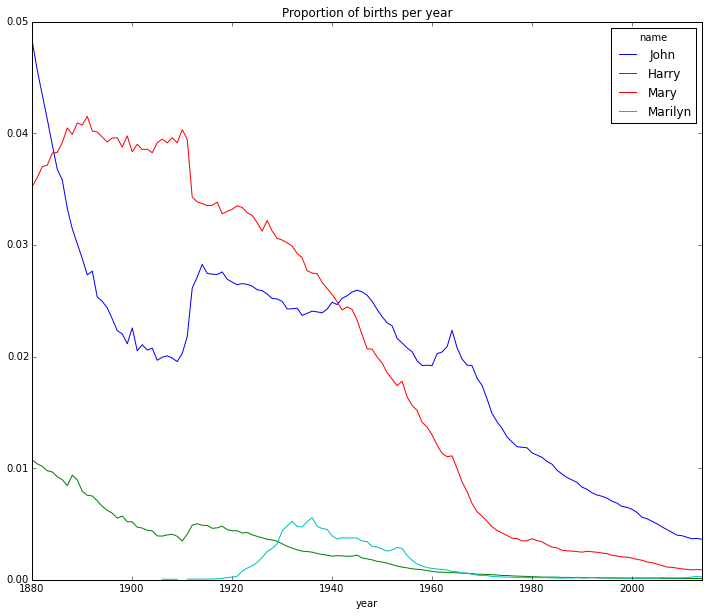

In [51]:
%matplotlib inline
subset = props[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(figsize=(12, 10), grid=False, title="Proportion of births per year")

**Ex 1.4.12 Write a method that takes `cumprop` as an array of numbers and finds the index of the first element where cumprop > 0.50**

In [52]:
def find_top_half_rank(cumprops):
    for i, cumprop in enumerate(cumprops):
        if cumprop > 0.50:
            return i
    
    # If cumprop *never* reaches 0.50, return the length of the list
    return len(cumprops)

In [53]:
find_top_half_rank([0.05, 0.15, 0.45, 0.47, 0.51, 0.76, 0.98])

4

**(!) Ex 1.4.13  As you can see above, some names have alternate spellings.  It's a tough problem to automatically group all "similar" names together.  A first step might be to find groups of names that start with the same 4 letters.  Find all such groups, listing the group with most variants first.**

In [54]:
unique_names = names.name.unique()
unique_names

array(['Mary', 'Anna', 'Emma', ..., 'Zijun', 'Zilas', 'Zirui'], dtype=object)

In [55]:
df = DataFrame(unique_names, columns=['name'])
df.head()

,name
0,Mary
1,Anna
2,Emma
3,Elizabeth
4,Minnie


In [56]:
df['start'] = df.name.apply(lambda x: x[0:4])
df.head()

,name,start
0,Mary,Mary
1,Anna,Anna
2,Emma,Emma
3,Elizabeth,Eliz
4,Minnie,Minn


In [57]:
# We can count the number of elements in a group,
# but then we lose all the names
df2 = df.groupby('start').count()
df2.head()

,name
start,
Aaba,1
Aabh,1
Aabi,1
Aabr,1
Aada,3


In [58]:
# Let's build our own groupby function
def agg_names(group):
    num_names = len(group)
    return Series([num_names, ", ".join(group['name'])],
                  ['numnames', 'names'])

df2 = df.groupby('start').apply(agg_names)
df2.head()  # Better!

,numnames,names
start,,
Aaba,1,Aaban
Aabh,1,Aabha
Aabi,1,Aabid
Aabr,1,Aabriella
Aada,3,"Aadam, Aadarsh, Aadan"


In [59]:
df2.sort_index(by='numnames', ascending=False).head()

,numnames,names
start,,
Shan,385,"Shannon, Shanna, Shane, Shana, Shan, Shanon, S..."
Mari,356,"Marie, Maria, Marion, Marian, Mariah, Marietta..."
Char,314,"Charlotte, Charity, Charles, Charlotta, Charli..."
Shar,314,"Sharon, Sharlene, Sharleen, Sharron, Sharline,..."
Sher,245,"Sherman, Sheridan, Sherwood, Sherry, Sherley, ..."


Well, it's a start...

**Ex 1.5.1: What's the equation of the line of best fit?**

You can read it off from the properties of the regression model.  In general, it's

$$
y = \text{<regr.coef_[0]>} \cdot x + \text{<regr.intercept_>}.
$$

In this example, it's

$$
y = 3.04 x - 2.76.
$$

**Ex 1.5.2: What's the predicted value of `y` for `x = 2.5`?**

In [60]:
# Let's recalculate the model here to have it available
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn import datasets, linear_model

def linear_data_sample(N=40, rseed=0, m=3, b=-2):
    """Sample N points on the line y = m*x + b + err, where err is normally distributed"""
    rng = np.random.RandomState(rseed)

    x = 10 * rng.rand(N)
    y = m * x + b + 1.5*rng.randn(N)

    return x, y

x, y = linear_data_sample()

regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(x.reshape((len(x), 1)), y)   # Scikit-learn expects x to be a column-vector

print(regr.predict(2.5))

[ 4.84135857]


**Ex 1.5.3.  What is the predicted class for a point at (1.5, 2.0)?**

In [61]:
# Let's rebuild the SVM here
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

from sklearn.svm import SVC # "Support Vector Classifier"
model = SVC(kernel='linear')
model.fit(X, y)

model.predict([1.5, 2.0])

array([1])

Which class is "1"?  Yellow or Magenta?  Let's classify some extreme points to find out:

In [62]:
model.predict([
        [+10.0, -10.0],   # Lower right
        [-10.0, +10.0],   # Upper left
])

array([1, 0])

So, "1" is yellow and "0" is magenta.  So (1.5, 2.0) is classified as yellow.  Indeed that matches what you can eyeball from the plot.

**(!) Ex 1.5.4. Make a plot that visualizes the result of the above classifier everywhere in the x-y plane.**

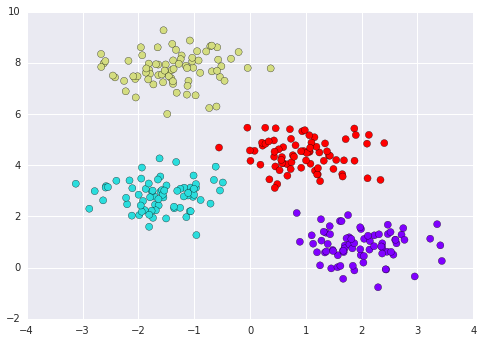

In [63]:
# Optional: importing this package makes the default plot settings nicer
import seaborn as sns; sns.set()

# Create the data and model here so that we can use them
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)

from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

## Pitfall: the cluster colours are arbitrary and different every time

The idea is to generate a uniform grid of points along the $x$-$y$ plane, then classify each of them, then plot them as we plotted the original data:

In [64]:
X = np.array([[x,y] for x in np.linspace(-4.0, 4.0, 100)
                    for y in np.linspace(-2.0, 10.0, 100)])

In [65]:
X[:10]

array([[-4.        , -2.        ],
       [-4.        , -1.87878788],
       [-4.        , -1.75757576],
       [-4.        , -1.63636364],
       [-4.        , -1.51515152],
       [-4.        , -1.39393939],
       [-4.        , -1.27272727],
       [-4.        , -1.15151515],
       [-4.        , -1.03030303],
       [-4.        , -0.90909091]])

In [66]:
y = est.predict(X)

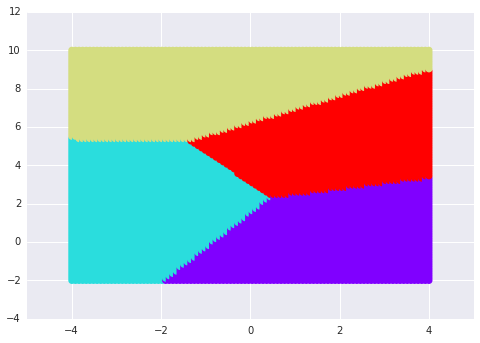

In [67]:
plt.scatter(X[:, 0], X[:, 1], lw=0, c=y, s=50, cmap='rainbow', );